In [7]:
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import statsmodels as sm
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
from scipy import  stats
filename1 = 'BATADAL_dataset_train.csv'
dataset1 = pd.read_csv(filename1)
get_ipython().magic(u'matplotlib inline')
from __future__ import division

In [8]:
filename2 = 'BATADAL_dataset_optimize.csv'
dataset2 = pd.read_csv(filename2)
filename3 = 'labeled_test_data.csv'
dataset3 = pd.read_csv(filename3)

The BATtle of the Attack Detection ALgorithms (BATADAL) will objectively compare the performance of algorithms for the detection of cyber attacks in water distribution systems. Participants will contribute an attack detection algorithm for a given water network following a set of rules that determine the exact goal of the algorithms.

Note: the flow data unit is LPS, pressure and water level units are meters.

Training Dataset 1: This dataset was released on November 20 2016, and it was generated from a one-year long simulation. The dataset does not contain any attacks, i.e. all the data pertains to C-Town normal operations.

Training Dataset 2: This dataset with partially labeled data was released on November 28 2016. The dataset is around 6 months long and contains several attacks, some of which are approximately labeled.

Test Dataset: This 3-months long dataset contains several attacks but no labels. The dataset was released on February 20 2017, and it is used to compare the performance of the algorithms (see rules document for details).

In [9]:
idx1 = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
        'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
        'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
        'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
        'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
        'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

In [10]:
idx_pattern1 = idx1
remove1 = ['S_PU1', 'F_PU3', 'S_PU3', 'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU9', 
           'S_PU9', 'F_PU11', 'S_PU11']
for item in remove1:
    idx_pattern1.remove(item)
print(idx_pattern1)

['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1', 'F_PU2', 'S_PU2', 'F_PU4', 'S_PU4', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU10', 'S_PU10', 'F_V2', 'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']


In [11]:
# look the anomaly data
data = dataset2 [dataset2[' ATT_FLAG']==1]
data

DATETIME   L_T1   L_T2   L_T3   L_T4   L_T5   L_T6   L_T7   F_PU1  \
1731  14/09/16 03   3.75   1.00   5.24   3.42   3.67   5.36   4.78   94.80   
1732  14/09/16 04   3.80   1.56   5.02   4.09   3.79   5.40   3.75   94.44   
1733  14/09/16 05   4.00   2.28   4.78   4.41   3.42   5.22   2.95   91.79   
1734  14/09/16 06   4.21   3.15   4.53   3.35   2.83   5.36   2.87   93.26   
1735  14/09/16 07   4.29   3.69   4.26   3.24   2.17   5.48   3.47   94.31   
1736  14/09/16 08   4.36   4.10   3.86   3.49   1.59   5.36   4.36   94.92   
1737  14/09/16 09   4.21   4.45   3.46   3.39   1.80   5.50   4.59   94.55   
1738  14/09/16 10   4.09   4.79   3.03   3.69   2.19   5.50   4.50   94.66   
1739  14/09/16 11   3.98   4.80   3.46   3.72   2.59   5.50   4.29   96.24   
1740  14/09/16 12   3.81   4.75   3.93   3.66   3.09   5.50   2.76   95.69   
1741  14/09/16 13   3.70   4.73   4.47   3.74   3.57   5.34   2.75   96.36   
1742  14/09/16 14   3.55   4.68   4.90   4.22   3.86   5.43   3.16   96.01   
1743  14/09/16 15   3.54   4.73   5.23   4.32   3.58   5.25   3.51   95.43   
1744  14/09/16 16   3.60   5.05   4.85   4.44   2.84   5.28   3.68   95.09   
1745  14/09/16 17   3.70   5.61   4.51   3.42   2.03   5.45   4.12   90.74   
1746  14/09/16 18   4.09   5.22   4.17   3.08   1.58   5.43   4.79   91.72   
1747  14/09/16 19   4.32   4.69   3.80   3.35   2.11   5.50   3.47   91.24   
1748  14/09/16 20   4.50   4.16   3.31   2.99   2.56   5.50   2.35  113.08   
1749  14/09/16 21   4.41   3.54   3.10   2.84   2.95   5.38   2.07  114.68   
1750  14/09/16 22   4.18   2.65   3.46   2.75   3.23   5.47   1.82  114.22   
1751  14/09/16 23   4.06   1.78   3.88   2.62   3.51   5.24   1.70  113.97   
1752  15/09/16 00   3.91   0.92   4.29   2.70   3.82   5.37   1.65  112.32   
1753  15/09/16 01   3.70   0.58   4.73   2.62   3.58   5.50   2.32  115.90   
1754  15/09/16 02   3.41   0.77   5.26   3.00   2.99   5.34   2.83  117.24   
1755  15/09/16 03   3.21   1.18   5.16   3.62   2.45   5.21   3.69  116.44   
1756  15/09/16 04   3.03   1.62   4.94   4.28   1.96   5.29   4.97  114.93   
1757  15/09/16 05   2.93   2.23   4.77   3.85   1.58   5.38   3.91  115.04   
1758  15/09/16 06   2.75   2.91   4.53   2.95   2.07   5.27   2.49  118.66   
1759  15/09/16 07   2.46   3.16   4.25   3.21   2.75   5.14   3.07  118.76   
1760  15/09/16 08   2.16   3.37   3.86   3.66   3.34   5.21   3.31  119.97   
...           ...    ...    ...    ...    ...    ...    ...    ...     ...   
3784  08/12/16 16   3.88   0.79   5.41   3.33   2.13   5.50   3.72  116.17   
3785  08/12/16 17   3.54   1.21   5.07   3.26   1.56   5.50   4.09  117.88   
3786  08/12/16 18   3.12   1.56   4.70   3.29   1.95   5.50   4.41  119.09   
3787  08/12/16 19   2.68   1.83   4.33   3.07   2.35   5.50   4.67  119.14   
3788  08/12/16 20   2.27   2.08   3.99   3.01   2.71   5.50   4.60  120.41   
3789  08/12/16 21   1.83   2.25   3.58   2.69   2.91   5.50   4.75  120.56   
3790  08/12/16 22   1.42   2.40   3.15   2.91   3.23   5.50   4.30  121.21   
3791  08/12/16 23   1.00   2.27   3.28   2.82   3.54   5.50   4.38  121.93   
3792  09/12/16 00   0.78   2.17   3.72   3.02   3.76   5.50   4.35   98.55   
3793  09/12/16 01   0.73   2.16   4.20   3.20   3.84   5.50   4.95   96.65   
3794  09/12/16 02   1.00   2.38   4.71   3.45   3.20   5.12   3.13   96.53   
3795  09/12/16 03   1.18   2.85   5.27   3.96   2.68   5.13   2.84   96.31   
3796  09/12/16 04   1.37   3.33   5.16   4.38   2.27   5.50   3.84   96.06   
3797  09/12/16 05   1.59   3.69   5.05   3.83   1.90   5.43   4.49   94.47   
3798  09/12/16 06   1.92   4.26   4.88   3.11   1.61   5.17   3.35   95.76   
3799  09/12/16 07   2.08   4.87   4.59   3.56   2.29   4.89   2.36   96.28   
3800  09/12/16 08   2.05   5.18   4.25   3.86   2.77   5.16   2.83   97.48   
3801  09/12/16 09   1.95   5.33   3.84   4.22   3.00   5.34   2.90   97.83   
3802  09/12/16 10   1.84   5.45   3.38   4.39   3.43   5.47   2.82   97.21   
3803  09/12/16 11   1.92   5.15

## PCA task

Perform PCA-based anomaly detection on the signal data. Set the threshold on training data to a value that results in few false positives on the training data. Plot the PCA residuals in one signal.

Do you see large abnormalities in the training data? Can you explain why these occur?

It is best to remove such abnormalities from the training data since you only want to model normal behavior. What kind of anomalies can you detect using PCA?

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [13]:
# make dataset2 have the same index as dataset1
idx_change = ['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
        'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
        'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
        'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
        'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
        'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG']
dataset2.columns = idx_change
data2 = dataset2 [dataset2['ATT_FLAG']==1]
test_data = data2[idx_pattern1]

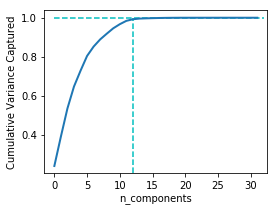

In [14]:
train_data =  dataset1[idx_pattern1]
pca = decomposition.PCA()
pipe = Pipeline(steps=[('scaling', StandardScaler()),('pca', pca)])
# Plot the PCA spectrum
scaler = StandardScaler().fit(train_data)
X_train_norm = scaler.transform(train_data)
pca.fit(X_train_norm)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(pca.explained_variance_ratio_.cumsum() , linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('Cumulative Variance Captured')
plt.vlines(12,0,1,colors = "c", linestyles = "dashed")
plt.hlines(1,0,32,colors = "c", linestyles = "dashed")

In [14]:
def pca_detection(train_data, test_data, N):    
    X = train_data
    pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components= N))])
    pipeline.fit(X)
    X = test_data
    newX = pipeline.transform(X)
    residuals = X - pipeline.inverse_transform(newX)
    residuals = np.linalg.norm(residuals, ord=2, axis = 1)
    return residuals

In [15]:
def pca_detection2(train_data, test_data, N):    
    scaler = StandardScaler().fit(train_data)
    X = scaler.transform(train_data)
    pca =  PCA(n_components= N)
    pca.fit(X)
    test_data = scaler.transform(test_data)
    #newX = pca.transform(test_data)
    I = np.eye(train_data.shape[1])
    eigenvectors = pca.components_
    P = np.transpose(eigenvectors[0:N+1])
    P_T = np.transpose(P)
    C = np.dot(P, P_T)
    residuals = np.dot((I - C),test_data.T)
    residuals = np.linalg.norm(residuals, ord=2, axis = 0)
    return residuals

(8761, 32)
(8739, 32)


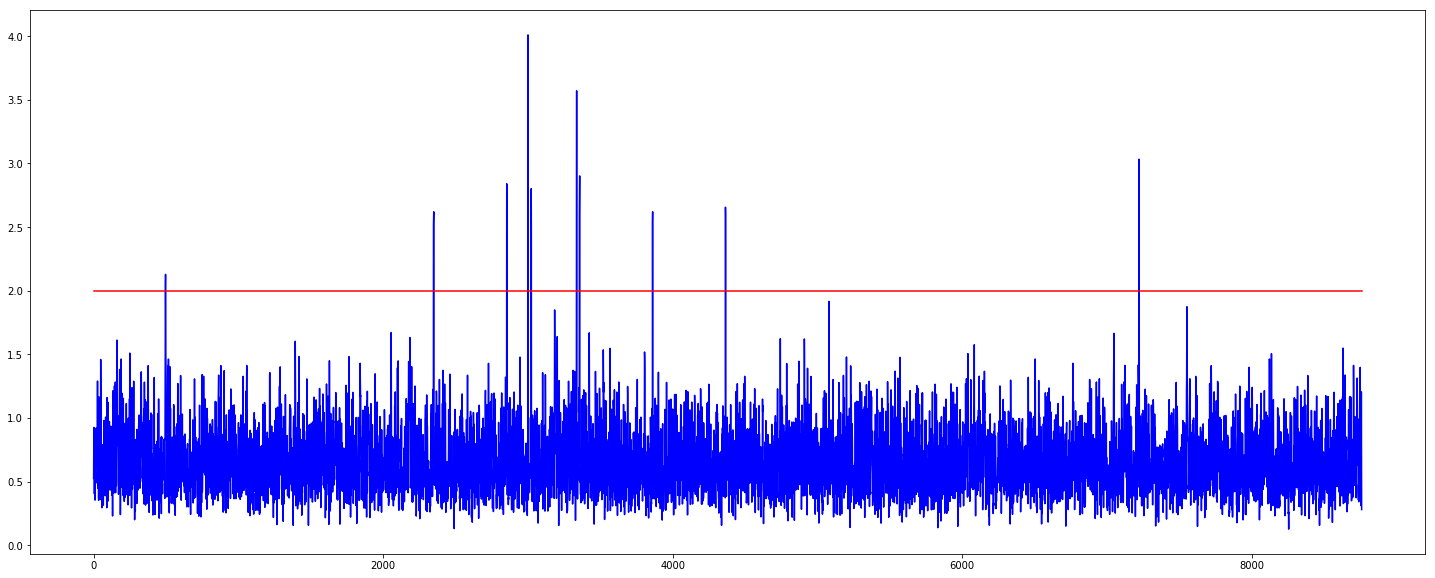

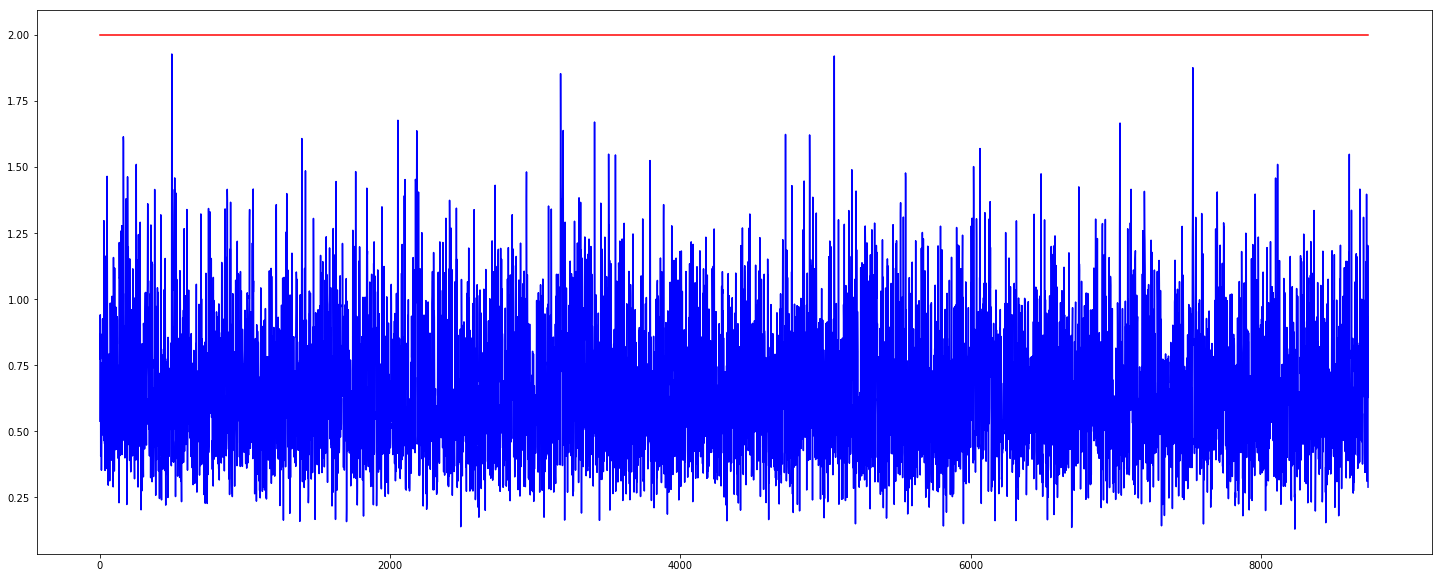

In [17]:
data3 = dataset2 [dataset2['ATT_FLAG']==-999]
threshold = 2 # set the threshold to delete the abnormalities
N = 12 # set the number of components
train_data =  dataset1[idx_pattern1]
data2 = dataset2[dataset2['ATT_FLAG']==1]
noattack_data = data3[idx_pattern1]
attack_data = data2[idx_pattern1]
val_data = pd.concat([attack_data, noattack_data],axis = 0)
noattack_label =  data3['ATT_FLAG']
attack_label = data2['ATT_FLAG']
val_label = pd.concat([attack_label, noattack_label],axis = 0)
val_label = np.array(val_label)

# for train set
train_residuals = pca_detection2(train_data, train_data, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(train_residuals,'b')
ax.plot([0,len(train_residuals)],[threshold,threshold],'r')

# delete the abnormalities
abnormalities = list(train_residuals[train_residuals > threshold])
train_residuals = list(train_residuals)

idx = []
for item in abnormalities:
    idx.append(train_residuals.index(item))
train_data_new = train_data.drop(idx)

# train again
train_residuals = pca_detection2(train_data_new, train_data_new, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(train_residuals,'b')
ax.plot([0,len(train_residuals)],[threshold,threshold],'r')
print(train_data.shape)
print(train_data_new.shape)

#### If we delete the outliers

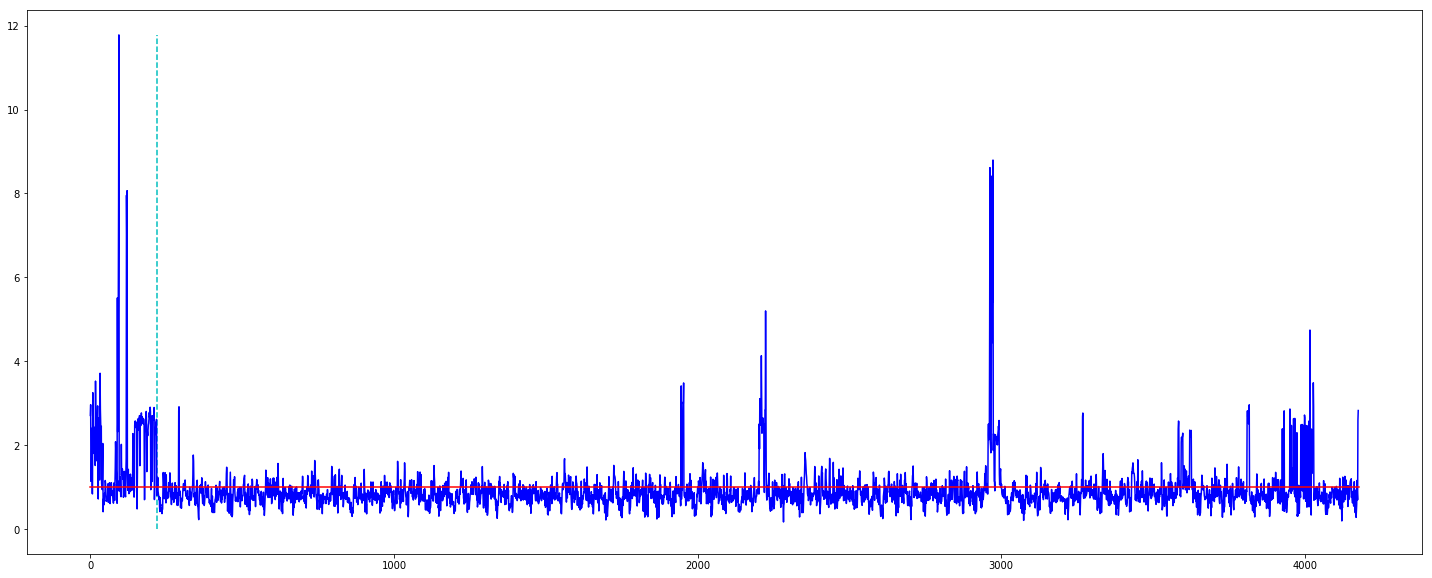

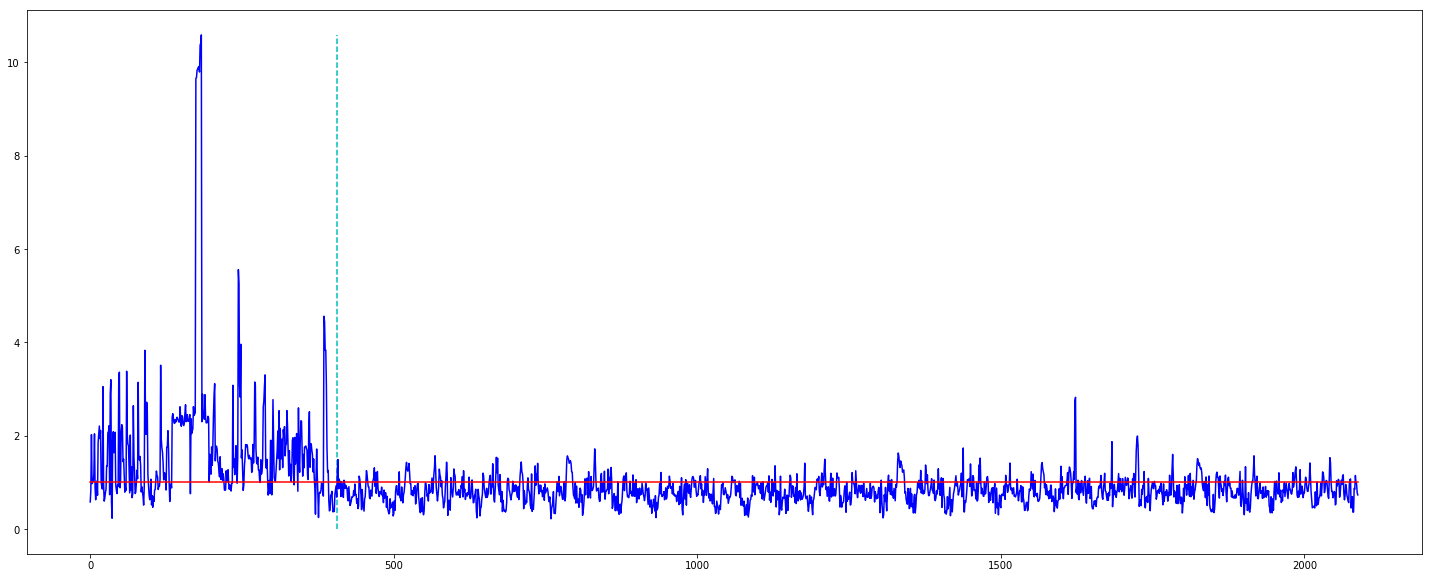

In [19]:
# for validate set
threshold = 1 # set the threshold for finding the anomaly
N = 12 # set the number of components
val_residuals = pca_detection2(train_data_new, val_data, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(val_residuals,'b')
ax.plot([0,len(val_residuals)],[threshold,threshold],'r')
ax.vlines(data2.shape[0],0,max(val_residuals),colors = "c", linestyles = "dashed")
# the left part´s true label are all 1
# the right part´s true label are all -999(in this case, they are all considered as normal data)


# for test set
noattack_data_all = dataset3[dataset3['ATT_FLAG']==0]
noattack_data = noattack_data_all[idx_pattern1]
attack_data_all = dataset3[dataset3['ATT_FLAG']==1]
attack_data = attack_data_all[idx_pattern1]
test_data = pd.concat([attack_data, noattack_data],axis = 0)

attack_label = attack_data_all['ATT_FLAG']
noattack_label = noattack_data_all['ATT_FLAG']
test_label =pd.concat([attack_label, noattack_label],axis = 0)


residuals = pca_detection2(train_data_new, test_data, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(residuals,'b')
ax.plot([0,len(residuals)],[threshold,threshold],'r')
ax.vlines(attack_data.shape[0],0,max(residuals),colors = "c", linestyles = "dashed")
# the left part´s true label are all 1, the right part´s true label are all 0

In [20]:
# predict label based on threshold for validation set
val_label = np.array(val_label)
label_v = []
for i in range(len(val_residuals)):
    if val_residuals[i] >= threshold:
        label_v.append(1)
    else:
        label_v.append(0)

In [21]:
# Calculate 
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(val_label)):
    if(label_v[i] == 1 and val_label[i] == 1):
        tp = tp + 1
    if(label_v[i] == 1 and val_label[i] == -999):
        fp = fp + 1
    if(label_v[i] == 0 and val_label[i] == 1):
        fn = fn + 1    
    if(label_v[i] == 0 and val_label[i] == -999):
        tn = tn + 1
print(tp)
print(fp)
print(fn)
print(tn)
print(tp/(tp+fn))


159
878
60
3080
0.726027397260274


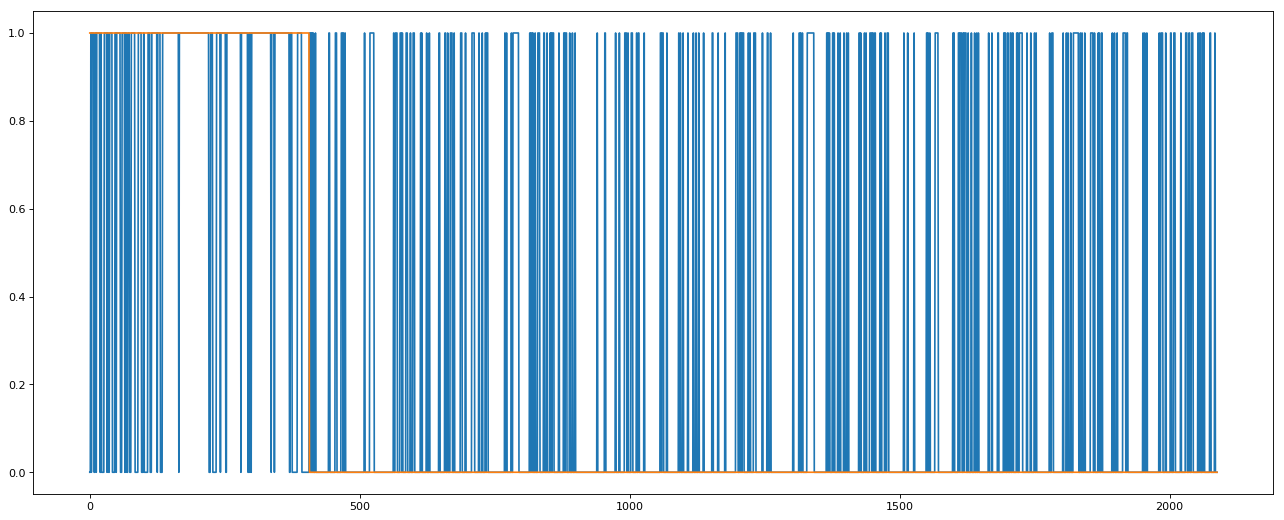

In [24]:
# predict label based on threshold for test set
test_label = np.array(test_label)
label = []
for i in range(len(residuals)):
    if residuals[i] >= threshold:
        label.append(1)
    else:
        label.append(0)
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(label)
plt.plot(test_label.T)

In [25]:
# Calculate 
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(label)):
    if(label[i] == 1 and test_label[i] == 1):
        tp = tp + 1
    if(label[i] == 1 and test_label[i] == 0):
        fp = fp + 1
    if(label[i] == 0 and test_label[i] == 1):
        fn = fn + 1    
    if(label[i] == 0 and test_label[i] == 0):
        tn = tn + 1
print(tp)
print(fp)
print(fn)
print(tn)
print(tp/(tp+fn))
print(tp/(tp+fp))

303
344
104
1338
0.7444717444717445
0.46831530139103555


#### If we do not delete the outlier

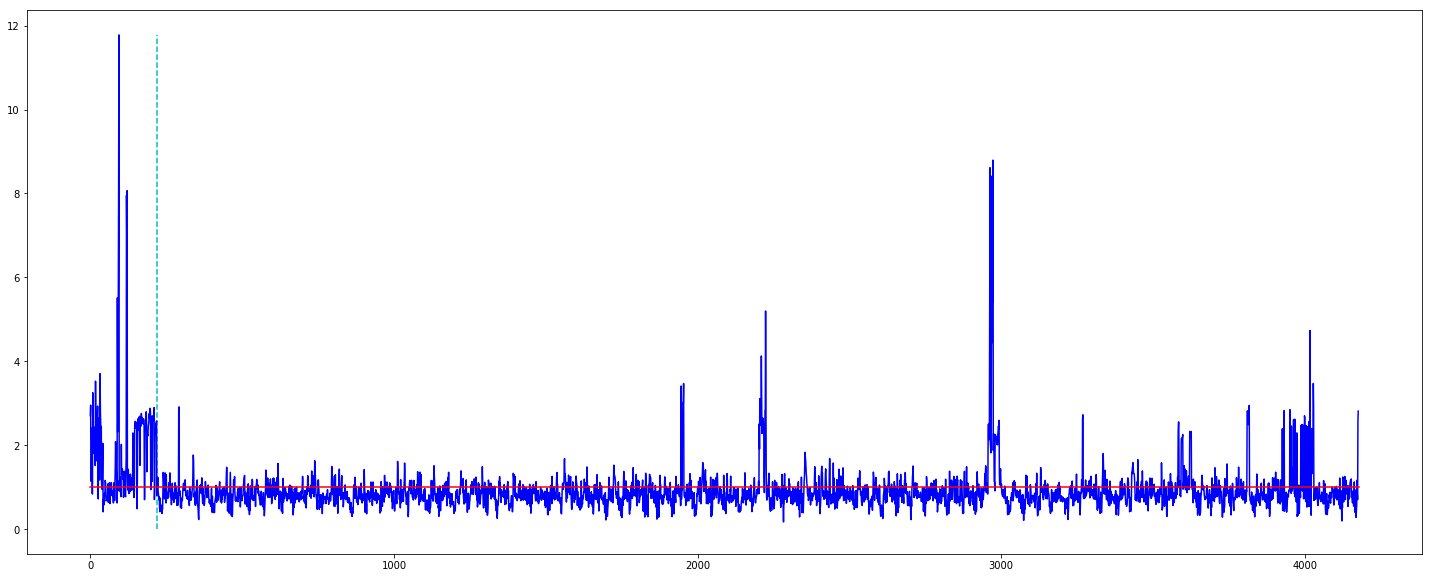

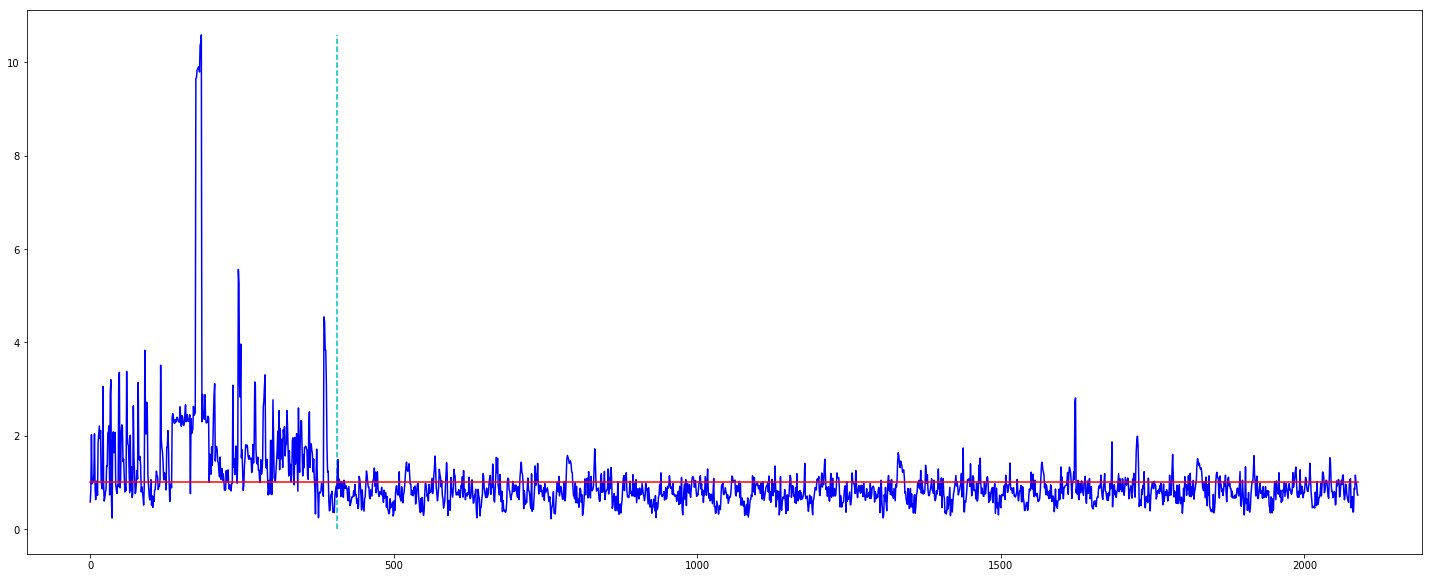

In [26]:
# for validate set
threshold = 1
N = 12
val_residuals = pca_detection2(train_data, val_data, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(val_residuals,'b')
ax.plot([0,len(val_residuals)],[threshold,threshold],'r')
ax.vlines(data2.shape[0],0,max(val_residuals),colors = "c", linestyles = "dashed")

# for test set
noattack_data_all = dataset3[dataset3['ATT_FLAG']==0]
noattack_data = noattack_data_all[idx_pattern1]
attack_data_all = dataset3[dataset3['ATT_FLAG']==1]
attack_data = attack_data_all[idx_pattern1]
test_data = pd.concat([attack_data, noattack_data],axis = 0)

attack_label = attack_data_all['ATT_FLAG']
noattack_label = noattack_data_all['ATT_FLAG']
test_label =pd.concat([attack_label, noattack_label],axis = 0)


residuals = pca_detection2(train_data, test_data, N)
figure, ax = plt.subplots(figsize=[25,10])
plt.figure(figsize=[35,10])
ax.plot(residuals,'b')
ax.plot([0,len(residuals)],[threshold,threshold],'r')
ax.vlines(attack_data.shape[0],0,max(residuals),colors = "c", linestyles = "dashed")

In [28]:
val_label = np.array(val_label)
label_v = []
for i in range(len(val_residuals)):
    if val_residuals[i] >= threshold:
        label_v.append(1)
    else:
        label_v.append(0)

In [29]:
# Calculate 
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(val_label)):
    if(label_v[i] == 1 and val_label[i] == 1):
        tp = tp + 1
    if(label_v[i] == 1 and val_label[i] == -999):
        fp = fp + 1
    if(label_v[i] == 0 and val_label[i] == 1):
        fn = fn + 1    
    if(label_v[i] == 0 and val_label[i] == -999):
        tn = tn + 1
print(tp)
print(fp)
print(fn)
print(tn)
print(tp/(tp+fn))
print(tp/(fp+tp))

159
877
60
3081
0.726027397260274
0.15347490347490347


In [30]:
test_label = np.array(test_label)
label = []
for i in range(len(residuals)):
    if residuals[i] >= threshold:
        label.append(1)
    else:
        label.append(0)

In [31]:
# Calculate 
tp = 0
fp = 0
tn = 0
fn = 0
for i in range(len(label)):
    if(label[i] == 1 and test_label[i] == 1):
        tp = tp + 1
    if(label[i] == 1 and test_label[i] == 0):
        fp = fp + 1
    if(label[i] == 0 and test_label[i] == 1):
        fn = fn + 1    
    if(label[i] == 0 and test_label[i] == 0):
        tn = tn + 1
print(tp)
print(fp)
print(fn)
print(tn)
print(tp/(tp+fn))
print(tp/(fp+tp))

303
346
104
1336
0.7444717444717445
0.46687211093990755
